In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
from PIL import Image

In [20]:
n_photos = 0
photo_extensions = {}
photo_dims = {}
photo_yx = {} # image height to width ratio, rounded to 2 decimals
photo_labels = {}
filenames = os.listdir('all-raw')
print(f'{len(filenames)} total images in New House dataset')

for filename in filenames:
    print('.',end='')
    exten = filename.split('.')[-1]
    if exten == 'HEIC': continue
    photo_extensions[exten] = photo_extensions.get(exten,0) + 1
    label = filename.split('_')[1]
    if label == '':
        print(filename)
        continue
    photo_labels[label] = photo_labels.get(label,0) + 1
    img = Image.open(f'all-raw/{filename}')
    #array = np.array(Image.open(f'all-raw/{filename}'))
    #dims = array.shape
    #photo_dims[dims] = photo_dims.get(dims,0) + 1
    h,w = img.size
    yx = round(h/w, 1)
    photo_yx[yx] = photo_yx.get(yx,0) + 1
    n_photos += 1

print('\n\nPhotos kept:', n_photos)
print('\nPhoto file extensions:')
print(photo_extensions)
# print('\nPhoto dimensions:')
# print(photo_dims)
print('\nPhoto height-to-width ratios:')
print(photo_yx)
print('\nPhoto label codes:')
print(photo_labels)

439 total images in New House dataset
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................

Photos kept: 417

Photo file extensions:
{'jpg': 413, 'JPG': 4}

Photo height-to-width ratios:
{1.3: 180, 0.5: 117, 1.0: 49, 0.8: 7, 0.6: 55, 0.9: 7, 1.1: 1, 0.7: 1}

Photo label codes:
{'F': 117, 'R': 117, 'T2': 67, 'T': 116}


In [13]:
set(photo_dims.values())

{1, 2, 4, 180}

(3264, 2448)
(512, 384)


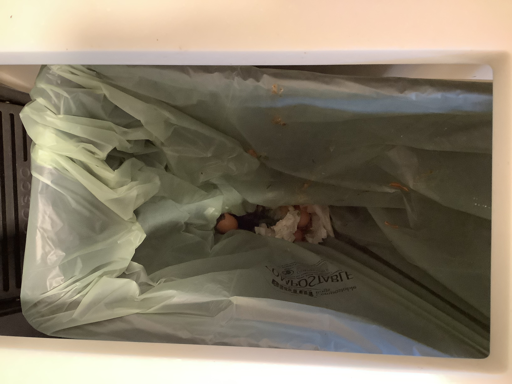

In [34]:
img = Image.open(f'all-raw/{filenames[0]}')
print(img.size)
#img = img.rotate(90)
img = img.resize((512,384))
print(img.size)
img.save('test_save_image.png')
display(img)

In [4]:
dest = 'new-house-resized-dataset'
BIGGER_DIM = 512

filenames = os.listdir('all-raw')
for filename in filenames:
    print('.',end='')
    exten = filename.split('.')[-1]
    if exten == 'HEIC': continue
    
    serial = int(filename.split('_')[0])
    label = filename.split('_')[1]
    if 'F' in label: label = 'compost'
    elif 'R' in label: label = 'recycle'
    else: label = 'trash'
    
    img = Image.open(f'all-raw/{filename}')
    w,h = img.size
    if h > w: # tall image
        img = img.rotate(90)
        #img.resize((int(w/h*BIGGER_DIM), BIGGER_DIM))
    else:
        pass
        #img.resize((BIGGER_DIM, int(h/w*BIGGER_DIM)))
    img = img.resize((512, 384))
    img.save(f'{dest}/{label}_{serial}.jpg')

.......................................................................................................................................................................................................................................................................................................................................................................................................................................................